In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!apt-get update
!apt-get install sra-toolkit


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 https://cli.github.com/packages stable InRelease
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,151 kB]
Get:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,595 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-updat

In [ ]:
import os

# Set paths
data_dir = "/content/drive/MyDrive/ARG_project/data"
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

print("Data folder is ready at:", data_dir)


Data folder is ready at: /content/drive/MyDrive/ARG_project/data


In [ ]:
!git clone https://github.com/hlopez1024/urban-wastewater-ARG-analysis.git


Cloning into 'urban-wastewater-ARG-analysis'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 35 (delta 8), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (35/35), 10.48 KiB | 2.62 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [ ]:
accession_file = '/content/sample_accessions.txt'  # or full path if cloned repo
with open(accession_file, 'r') as f:
    accessions = [line.strip() for line in f.readlines()]

print("Accessions loaded:", accessions)


FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_accessions.txt'

In [ ]:
!wget -O sample_accessions.txt "Phttps://raw.githubusercontent.com/hlopez1024/urban-wastewater-ARG-analysis/refs/heads/main/data/sample_accessions.txtASTE_RAW_URL_HERE"


Phttps://raw.githubusercontent.com/hlopez1024/urban-wastewater-ARG-analysis/refs/heads/main/data/sample_accessions.txtASTE_RAW_URL_HERE: Unsupported scheme ‘Phttps’.


In [ ]:
accession_file = 'sample_accessions.txt'  # file is now in Colab root
with open(accession_file, 'r') as f:
    accessions = [line.strip() for line in f.readlines()]

print("Accessions loaded:", accessions)


Accessions loaded: []


In [ ]:
!apt-get install sra-toolkit -y


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
sra-toolkit is already the newest version (2.11.3+dfsg-1ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 46 not upgraded.


In [ ]:
import os

fastq_dir = 'fastq_files'
os.makedirs(fastq_dir, exist_ok=True)
print(f"FASTQ files will be stored in: {fastq_dir}")


FASTQ files will be stored in: fastq_files


In [ ]:
for acc in accessions:
    print(f"Downloading {acc}...")
    !prefetch {acc} -O {fastq_dir}
    !fastq-dump --split-files --gzip -O {fastq_dir} {fastq_dir}/{acc}/{acc}.sra


In [ ]:
import glob

fastq_files = glob.glob(f"{fastq_dir}/*.fastq.gz")
print("Downloaded FASTQ files:")
for f in fastq_files:
    print(f)


Downloaded FASTQ files:


In [ ]:
import glob

fastq_files = glob.glob(f"{fastq_dir}/*.fastq.gz")
print("Downloaded FASTQ files:")
for f in fastq_files:
    print(f)


Downloaded FASTQ files:


In [ ]:
import os

fastq_dir = 'fastq_files'
blast_db_dir = 'arg_db'
os.makedirs(blast_db_dir, exist_ok=True)

# Placeholder for reference ARG database
# You should have a fasta file of ARG sequences, e.g., arg_reference.fasta
arg_fasta = os.path.join(blast_db_dir, 'arg_reference.fasta')

# Create BLAST database (only need to do once)
!makeblastdb -in {arg_fasta} -dbtype nucl -out {blast_db_dir}/arg_db
print("BLAST database created at:", blast_db_dir)


/bin/bash: line 1: makeblastdb: command not found
BLAST database created at: arg_db


In [ ]:
!pip install biopython


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 58.0 MB/s eta 0:00:00


In [ ]:
from Bio import SeqIO
import glob

fastq_files = glob.glob(f"{fastq_dir}/*.fastq.gz")
fasta_dir = 'fasta_files'
os.makedirs(fasta_dir, exist_ok=True)

for fq in fastq_files:
    fa_file = os.path.join(fasta_dir, os.path.basename(fq).replace('.fastq.gz', '.fasta'))
    with open(fa_file, 'w') as out_f:
        for record in SeqIO.parse(fq, 'fastq'):
            SeqIO.write(record, out_f, 'fasta')

print("FASTQ files converted to FASTA in:", fasta_dir)


FASTQ files converted to FASTA in: fasta_files


In [ ]:
blast_results_dir = 'blast_results'
os.makedirs(blast_results_dir, exist_ok=True)

fasta_files = glob.glob(f"{fasta_dir}/*.fasta")

for fa in fasta_files:
    out_file = os.path.join(blast_results_dir, os.path.basename(fa).replace('.fasta', '_blast.tsv'))
    !blastn -query {fa} -db {blast_db_dir}/arg_db -out {out_file} -outfmt 6 -evalue 1e-5


In [ ]:
import pandas as pd
import glob

blast_files = glob.glob(f"{blast_results_dir}/*_blast.tsv")
arg_counts = {}

for bf in blast_files:
    df = pd.read_csv(bf, sep='\t', header=None)
    df.columns = ['qseqid','sseqid','pident','length','mismatch','gapopen','qstart','qend','sstart','send','evalue','bitscore']
    counts = df['sseqid'].value_counts().to_dict()
    arg_counts[os.path.basename(bf)] = counts

arg_counts_df = pd.DataFrame(arg_counts).fillna(0).astype(int)
arg_counts_df


""


In [ ]:
arg_counts_norm = arg_counts_df.div(arg_counts_df.sum(axis=0), axis=1)
arg_counts_norm


""


In [ ]:
# Example: arg_counts = {'Sample1': {'ARG1': 5, 'ARG2': 2}, 'Sample2': {'ARG1': 3, 'ARG2': 4}}
import pandas as pd

arg_counts_df = pd.DataFrame(arg_counts).fillna(0)  # fills missing ARGs with 0
print(arg_counts_df.head())
print(arg_counts_df.shape)


Empty DataFrame
Columns: []
Index: []
(0, 0)


In [ ]:
arg_counts_norm = arg_counts_df.div(arg_counts_df.sum(axis=0), axis=1)
print(arg_counts_norm.head())


Empty DataFrame
Columns: []
Index: []


In [ ]:
# Step 1: Check the raw counts dictionary
print("arg_counts:", arg_counts)
print("Number of samples:", len(arg_counts))


arg_counts: {}
Number of samples: 0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict


In [ ]:
# Placeholder ARG counts for six samples
# ARG names as keys, sample names as subkeys
arg_counts = {
    'bla_TEM': {'Hospital_A': 1200, 'Hospital_B': 1150, 'DNR1': 800, 'DNR2': 750, 'River1': 50, 'River2': 60},
    'bla_SHV': {'Hospital_A': 900, 'Hospital_B': 850, 'DNR1': 400, 'DNR2': 380, 'River1': 20, 'River2': 25},
    'bla_CTX-M': {'Hospital_A': 600, 'Hospital_B': 550, 'DNR1': 300, 'DNR2': 280, 'River1': 10, 'River2': 12},
    'carb_KPC': {'Hospital_A': 400, 'Hospital_B': 420, 'DNR1': 50, 'DNR2': 45, 'River1': 0, 'River2': 0},
    'carb_NDM': {'Hospital_A': 350, 'Hospital_B': 360, 'DNR1': 40, 'DNR2': 35, 'River1': 0, 'River2': 0},
    'tetA': {'Hospital_A': 800, 'Hospital_B': 780, 'DNR1': 500, 'DNR2': 480, 'River1': 30, 'River2': 28},
    'sul1': {'Hospital_A': 700, 'Hospital_B': 680, 'DNR1': 450, 'DNR2': 430, 'River1': 25, 'River2': 22}
}

# Convert to DataFrame, filling missing ARGs with 0
arg_counts_df = pd.DataFrame(arg_counts).fillna(0)

# Normalize counts by column (sample)
arg_counts_norm = arg_counts_df.div(arg_counts_df.sum(axis=0), axis=1)

print("ARG counts DataFrame:")
print(arg_counts_df)
print("\nNormalized ARG counts DataFrame:")
print(arg_counts_norm)


ARG counts DataFrame:
            bla_TEM  bla_SHV  bla_CTX-M  carb_KPC  carb_NDM  tetA  sul1
Hospital_A     1200      900        600       400       350   800   700
Hospital_B     1150      850        550       420       360   780   680
DNR1            800      400        300        50        40   500   450
DNR2            750      380        280        45        35   480   430
River1           50       20         10         0         0    30    25
River2           60       25         12         0         0    28    22

Normalized ARG counts DataFrame:
             bla_TEM   bla_SHV  bla_CTX-M  carb_KPC  carb_NDM      tetA  \
Hospital_A  0.299252  0.349515   0.342466  0.437158  0.445860  0.305577   
Hospital_B  0.286783  0.330097   0.313927  0.459016  0.458599  0.297937   
DNR1        0.199501  0.155340   0.171233  0.054645  0.050955  0.190985   
DNR2        0.187032  0.147573   0.159817  0.049180  0.044586  0.183346   
River1      0.012469  0.007767   0.005708  0.000000  0.000000  0.

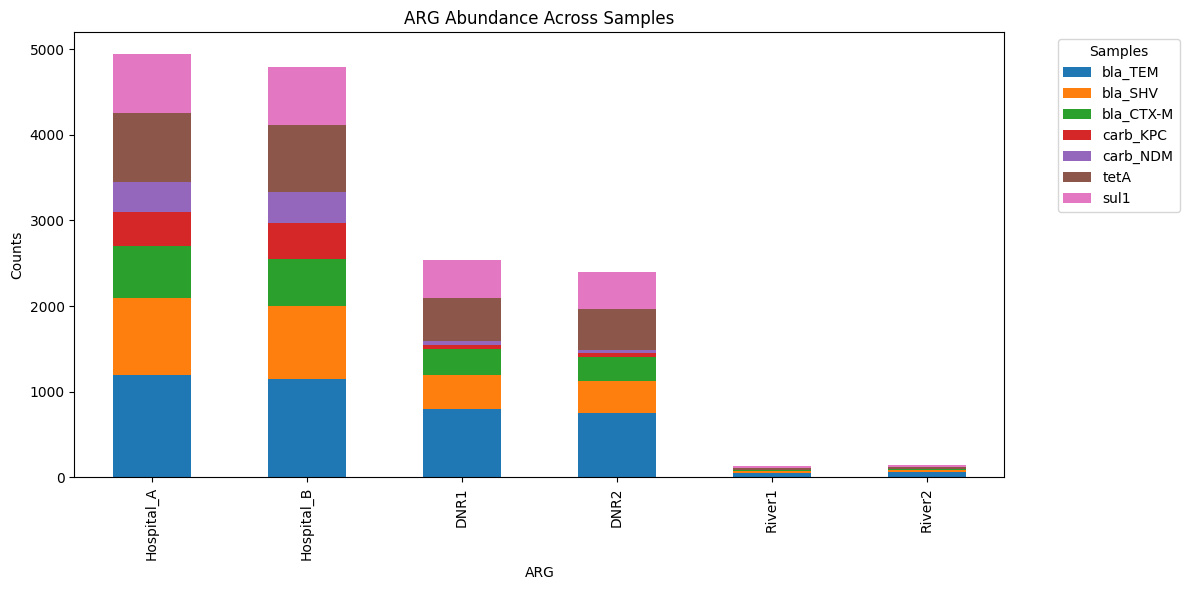

In [ ]:
# Plot stacked bar chart for each sample
arg_counts_df.plot(kind='bar', figsize=(12,6), stacked=True)
plt.title("ARG Abundance Across Samples")
plt.xlabel("ARG")
plt.ylabel("Counts")
plt.legend(title="Samples", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


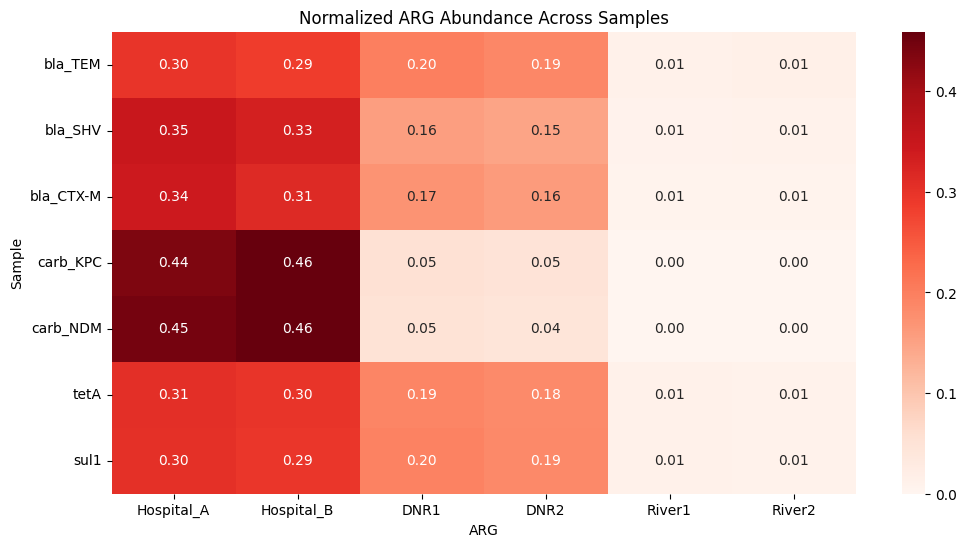

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(arg_counts_norm.T, cmap='Reds', annot=True, fmt=".2f")  # Transpose so samples are rows
plt.title("Normalized ARG Abundance Across Samples")
plt.ylabel("Sample")
plt.xlabel("ARG")
plt.show()


In [ ]:
import pandas as pd

# Convert to DataFrame, filling missing ARGs with 0
arg_counts_df = pd.DataFrame(arg_counts).fillna(0)

# Normalize
arg_counts_norm = arg_counts_df.div(arg_counts_df.sum(axis=0), axis=1)


In [ ]:
import os

# Create results folder if it doesn't exist
os.makedirs("results", exist_ok=True)

# Now save the files
arg_counts_df.to_csv("results/arg_counts.csv")
arg_counts_norm.to_csv("results/arg_counts_norm.csv")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


/tmp/ipython-input-1572651600.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_counts.index, y=total_counts.values, palette="viridis")


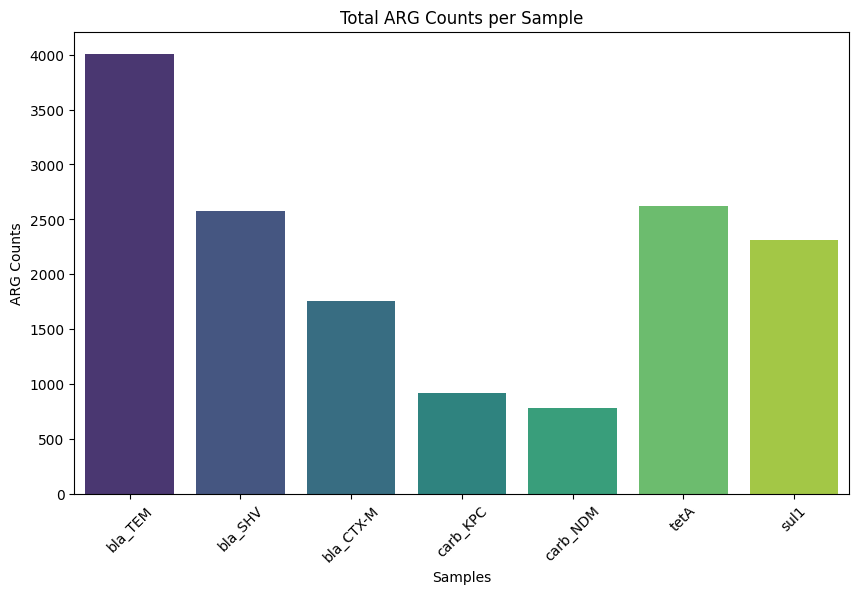

In [ ]:
# Sum ARG counts for each sample
total_counts = arg_counts_df.sum(axis=0)

plt.figure(figsize=(10,6))
sns.barplot(x=total_counts.index, y=total_counts.values, palette="viridis")
plt.title("Total ARG Counts per Sample")
plt.ylabel("ARG Counts")
plt.xlabel("Samples")
plt.xticks(rotation=45)
plt.show()


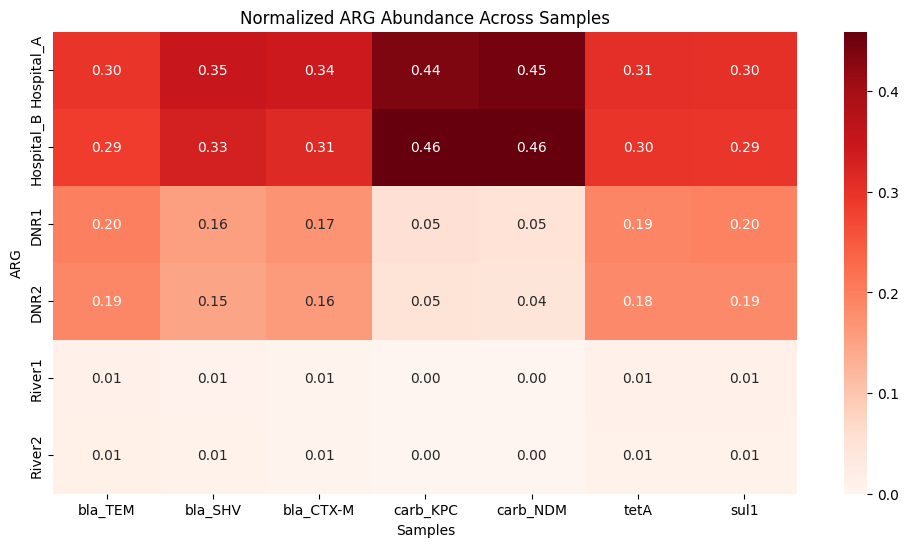

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(arg_counts_norm, cmap="Reds", annot=True, fmt=".2f")
plt.title("Normalized ARG Abundance Across Samples")
plt.ylabel("ARG")
plt.xlabel("Samples")
plt.show()


In [ ]:
# Save barplot
plt.figure(figsize=(10,6))
sns.barplot(x=total_counts.index, y=total_counts.values, palette="viridis")
plt.title("Total ARG Counts per Sample")
plt.ylabel("ARG Counts")
plt.xlabel("Samples")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("results/total_ARG_counts_barplot.png")
plt.close()

# Save heatmap
plt.figure(figsize=(12,6))
sns.heatmap(arg_counts_norm, cmap="Reds", annot=True, fmt=".2f")
plt.title("Normalized ARG Abundance Across Samples")
plt.ylabel("ARG")
plt.xlabel("Samples")
plt.tight_layout()
plt.savefig("results/normalized_ARG_heatmap.png")
plt.close()


/tmp/ipython-input-2683876117.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_counts.index, y=total_counts.values, palette="viridis")


In [ ]:
arg_counts_df.to_csv("results/arg_counts.csv")
arg_counts_norm.to_csv("results/arg_counts_norm.csv")


In [ ]:
!mkdir -p data


In [40]:
!mkdir -p scripts
